## Instruction;
1. target; is_safe
2. feature; nitrates, nitrites,radium
3. Missing value treatment 
4. Data split to train:test = 80% : 20%, random_state=0, stratify=y
5. Create KNN model, test the accuracy of the model to predict

In [29]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv('waterQuality1.csv')
df = df[['is_safe', 'nitrates', 'nitrites', 'radium']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   is_safe   7999 non-null   object 
 1   nitrates  7999 non-null   float64
 2   nitrites  7999 non-null   float64
 3   radium    7999 non-null   float64
dtypes: float64(3), object(1)
memory usage: 250.1+ KB


In [31]:
df['is_safe'].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

In [32]:
df[df['is_safe']=='#NUM!']

,is_safe,nitrates,nitrites,radium
7551,#NUM!,4.37,1.43,2.54
7568,#NUM!,12.10,2.03,2.05
7890,#NUM!,9.57,1.45,7.70


In [33]:
df = df.drop(index=[7551,7568,7890], axis=0)

In [34]:
df['is_safe'].value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

In [35]:
df['is_safe']=df['is_safe'].astype(int)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   is_safe   7996 non-null   int64  
 1   nitrates  7996 non-null   float64
 2   nitrites  7996 non-null   float64
 3   radium    7996 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 312.3 KB


In [37]:
feature = ['nitrates', 'nitrites', 'radium']
target = ['is_safe']

X=df[feature]
y=df[target]

In [38]:
df[['nitrates', 'nitrites', 'radium']].isnull().sum()

nitrates    0
nitrites    0
radium      0
dtype: int64

### Data Splitting

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 0
)

### Modelling dengan KNN Tanpa Scaling

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_predict_class = knn.predict(X_test)

In [41]:
print('Model accuracy in test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset: 0.854375


##### Without scaling we have 85% acccuracy of the KNN model

### Modelling dengan KNN Dengan Scaling

In [46]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_predict_class = knn.predict(X_test_scaled)

In [48]:
print('Model accuracy in test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy in test dataset: 0.8525


### Resulting that the model is using 3 factors and when scaller is used(MinMax Scaler), the accuracy score is decreased from 85.4% to 85.2%

#### Further exploration on finding best k-factors for the model

##### doing squareroot of the total data to predict the range of the k-factor

In [49]:
df.shape[0]**.5

89.42035562443263

In [50]:
k = range(1, 100, 2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)

    y_predict_train = knn.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))

    y_predict_test = knn.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracies.append(acc_score)

    if score < acc_score:
        score = acc_score
        best_k = i

In [51]:
print('best score is; ', score)
print('best k-factor is; ', best_k)

best score is;  0.88625
best k-factor is;  13


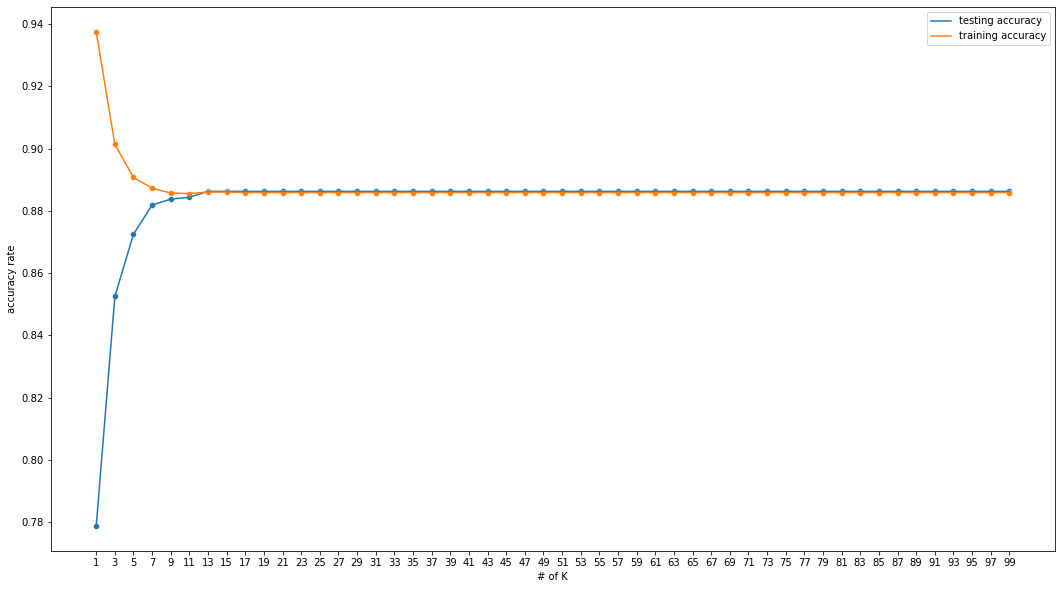

In [55]:
plt.figure(figsize=(18, 10))
sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)
plt.legend(['testing accuracy', 'training accuracy'])
plt.xlabel('# of K')
plt.ylabel('accuracy rate')
plt.xticks(list(k))
plt.show()

##### As seen on the plot, k-factor of 13 is the optimum k used in the model (and the gap between testing score and training score is minimum) as the following k goes flat.